In [1]:
import numpy as np

In [ ]:
from scipy.stats import invgamma

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# https://stats.stackexchange.com/questions/585019/sequential-bayesian-updating-of-mean-and-variance-of-normal-distribution
# https://sites.stat.washington.edu/raftery/Research/PDF/bayescourse.pdf
# https://people.eecs.berkeley.edu/%7Ejordan/courses/260-spring10/lectures/lecture5.pdf
# https://github.com/kamil-dedecius/bml

In [337]:
alpha_0 = 0.8
beta_0 = 2

In [338]:
# generate data from a normal distribution
mu = 14
sigma = 2

In [384]:
N = 100
data = np.random.normal(mu, sigma, N)

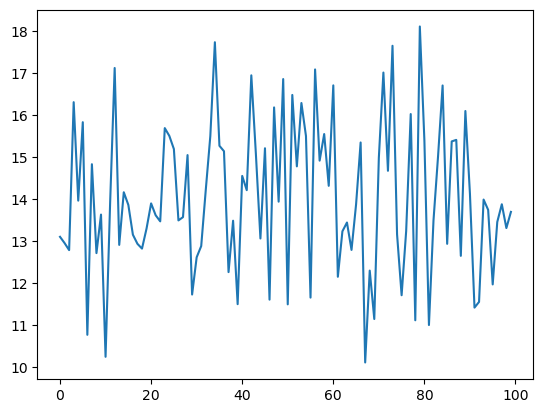

In [385]:
plt.plot(data)

In [386]:
n_0 = 1

In [405]:
alphas: list[float] = [alpha_0]
betas: list[float] = [beta_0]
ns: list[int] = [n_0]
mus: list[float] = [3]

In [406]:
for i in range( N):
    alphas.append(alphas[i-1] + 1/2)
    ns.append(ns[i-1]+ 1)
    # betas.append(betas[i-1] + 0.5 *(ns[i]/(ns[i]+1))*(data[i]-mus[i-1])**2)

    betas.append(betas[i-1] + 0.5*(data[i]-mus[i-1])**2)
    mus.append(mus[i-1] + 1/(ns[i-1]+1) * (data[i-1]-mus[i-1]))

In [407]:
sigmas=np.array([b/(a-1) for b,a in zip(betas, alphas)])

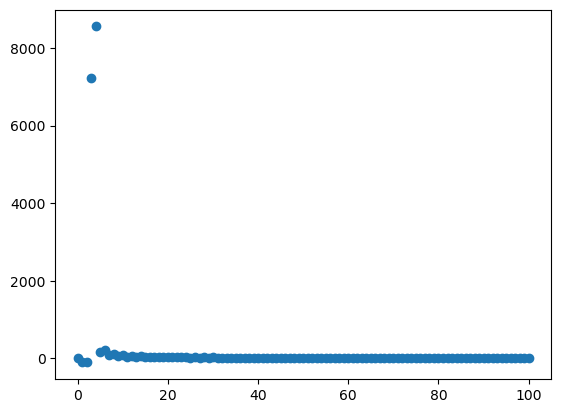

In [408]:
plt.scatter(np.arange(sigmas.shape[0]), sigmas)

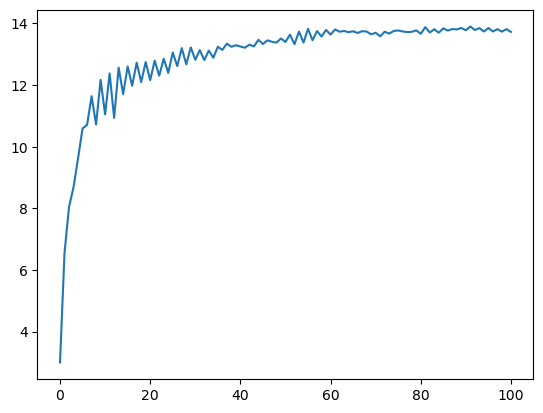

In [391]:
# # plt.plot(alphas)
# plt.plot(betas)
# plt.show()
# plt.plot(list(map(np.log, betas)))
# plt.show()
plt.plot(mus)
plt.show()
# plt.plot(ns)

In [392]:
data2 = data.copy()

In [393]:
data2[np.random.randint(0, data2.shape[0], 15)] *=np.random.randint(-6, 6, 15)

In [394]:
np.random.randint(-6, 6, 15)

array([ 3,  1, -1, -5,  3, -2, -5,  4,  4, -6,  3, -1, -3,  0,  3])

In [395]:
mus = np.array(mus)

In [396]:
np.where(np.abs(data2) > mus[1:] + 3*sigmas[1:])

(array([ 0,  1, 41, 72, 80, 98]),)

In [397]:
anomaly_index = np.where(np.abs(data2) > mus[1:] + 3*sigmas[1:])

In [398]:
anomaly_index[0]

array([ 0,  1, 41, 72, 80, 98])

In [399]:
sigmas[:10]

array([-2.02020202e+00, -1.08096835e+02, -1.05052709e+02,  7.22894113e+03,
        8.55374111e+03,  1.68936118e+02,  2.05404036e+02,  8.53186163e+01,
        1.12107060e+02,  5.74452341e+01])

In [404]:
data2: np.ndarray 

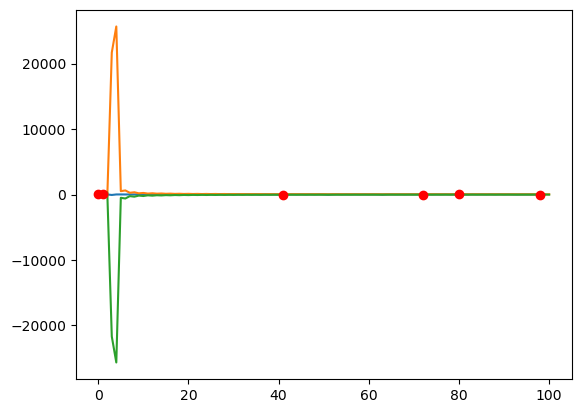

In [400]:
plt.plot(data2)
plt.plot(mus + 3*sigmas)
plt.plot(mus - 3*sigmas)
plt.plot(anomaly_index[0], data2[anomaly_index], color='r', marker='o', linestyle='')

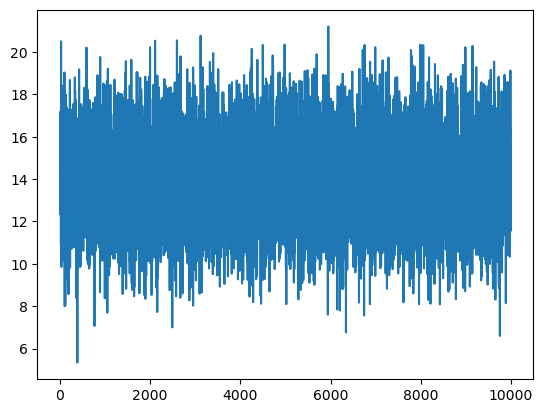

In [326]:
plt.plot(data)